# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.09000000171363354
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.10000000149011612


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:

from maddpg import MADDPGAgent
from collections import deque
import torch

In [9]:
agent = MADDPGAgent(state_size=state_size, action_size=action_size, seed=0)

In [10]:
def learn(n_episodes=10000, max_t=1000):
    
    scores = []                          # list to store the scores (averaged over all agents) estimated from each episode of training
    scores_window = deque(maxlen=100)    # last 100 averaged (over all agents) scores
    scores_mean = []                     # list to store the avg score (averaged over all agents) for 100 consecutive episodes
    for i_episode in range(1, n_episodes+1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        
        # set initial value of score as 0
        scores_list = np.zeros(num_agents)     # list to store the scores of each agent for very episode
        
        # get initial state ===> dimension will be (num_agents,)
        states = env_info.vector_observations
        
        # resetting the noise process
        agent.reset()
        
        
        for t_step in range(max_t):
            
            # taking actions based upon current estimate of DDPG policy for all agents
            actions = agent.act(states)
            
            # now sending these actions to the envirnonment so that each agent can transition to the next state indepemdently
            env_info = env.step(actions)[brain_name]
           
            # get the next states ===> dimension will be (num_agents,)
            next_states = env_info.vector_observations
            
            # get the rewards
            rewards = env_info.rewards
            dones = env_info.local_done
            
            # now the agents learns from these experience tuples
            agent.step(states, actions, rewards, next_states, dones)
            
            
            # current_state <==== next_state
            states = next_states
            
            # appending each agent immediate reward to it total undiscounted score
            scores_list += rewards
            
            # check if any of the agents have reach the end of episode
            if np.any(dones):
                break
                
        # episode ends here       
        
        # taking the max of scores of all agents for this episode
        score_for_this_episode = np.max(scores_list)
        
        # appending this score to scores_window
        scores_window.append(score_for_this_episode)    # save most recent score
        
        # calculate the avg score (over 100 consecutive episodes); this is our final score
        # this actually has to be more than 30.0
        
        final_score = np.mean(scores_window)                 # denotes the final score (=avg score over 100 consecutive episodes for all agents)
        
        # appeding the episode score to scores list
        scores.append(score_for_this_episode)                                 # save most recent score
    
        print ("\rEpisode {:}\t Average Score {:.2f}".format(i_episode, final_score), end="")
        
        if i_episode % 100 == 0:
            print ("\rEpsiode {:}\t Average Score {:.2f}".format(i_episode, final_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic1.pth')
            
        if i_episode >= 100:
            scores_mean.append(final_score)                                        # appending final score
            
        if final_score >= 0.5:    # environment solved
            print ("\nEnvironment solved in {:d} episodes!\tAverage Score: {:2f}".format(i_episode-100, final_score))
            
            torch.save(agent.actor_local.state_dict(), "checkpoint_actor1.pth")
            torch.save(agent.critic_local.state_dict(), "checkpoint_critic1.pth")
            break
            
    return scores, scores_mean, agent

In [12]:
dscores, dscores_mean, agent = learn()

Epsiode 100	 Average Score 0.01
Epsiode 200	 Average Score 0.01
Epsiode 300	 Average Score 0.01
Epsiode 400	 Average Score 0.01
Epsiode 500	 Average Score 0.00
Epsiode 600	 Average Score 0.00
Epsiode 700	 Average Score 0.00
Epsiode 800	 Average Score 0.00
Epsiode 900	 Average Score 0.00
Epsiode 1000	 Average Score 0.00
Epsiode 1100	 Average Score 0.00
Epsiode 1200	 Average Score 0.00
Epsiode 1300	 Average Score 0.00
Epsiode 1400	 Average Score 0.01
Epsiode 1500	 Average Score 0.04
Epsiode 1600	 Average Score 0.18
Epsiode 1700	 Average Score 0.10
Epsiode 1800	 Average Score 0.08
Epsiode 1900	 Average Score 0.16
Epsiode 2000	 Average Score 0.26
Epsiode 2100	 Average Score 0.24
Epsiode 2200	 Average Score 0.15
Epsiode 2300	 Average Score 0.35
Epsiode 2400	 Average Score 0.05
Epsiode 2500	 Average Score 0.12
Epsiode 2600	 Average Score 0.08
Epsiode 2700	 Average Score 0.12
Epsiode 2800	 Average Score 0.12
Epsiode 2900	 Average Score 0.34
Epsiode 3000	 Average Score 0.12
Epsiode 3100	 Avera

In [13]:
import matplotlib.pyplot as plt

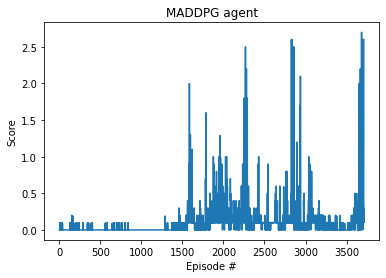

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(dscores)+1), dscores)
plt.title('MADDPG agent')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

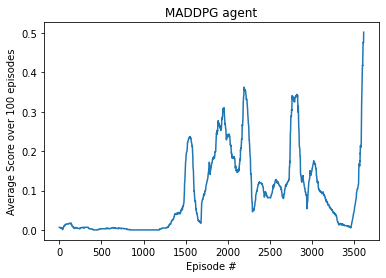

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(dscores_mean)+1), dscores_mean)
plt.title('MADDPG agent')
plt.ylabel('Average Score over 100 episodes')
plt.xlabel('Episode #')
plt.show()